## CREANDO GRÁFICOS CON MATLPLOTLIB

In [64]:
import matplotlib.pyplot as plt
import gen_functions as gf
import numpy as np
import decimal_to_binary as dtb
import binary_decode as bind

In [94]:
# Creando una función para definir la amplitud de la función Seno
x = np.arange(0, 0.000000832, 0.000000001)
len(x)

832

### Graficando la señal generada

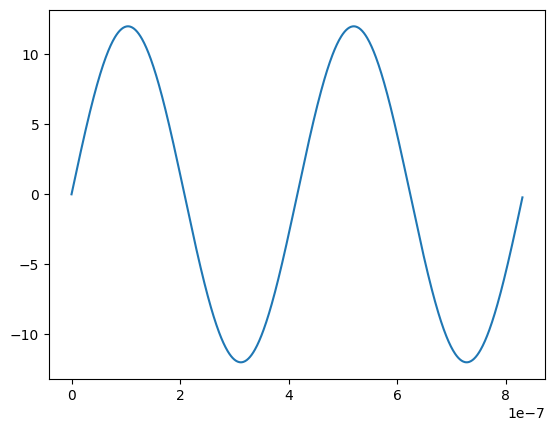

In [95]:
y = gf.generate_sin(12, 15.1*10**6, x)
plt.plot(x, y)
plt.show()
# Guardar una imagen
# plt.savefig("cuadratica.jpg")
# plt.close()

##  Definiendo el periodo de muestreo de la señal

[  0.           2.34405509   4.59779841   6.67439772   8.49384579
   9.98604292  11.09349773  11.77354218  11.99997553  11.76407374
  11.07492564   9.95908274   8.45953623   6.63406066   4.55298796
   2.29649771  -0.04847203  -2.39157422  -4.64253384  -6.71462588
  -8.52801677 -10.01284017 -11.11188881 -11.78281852 -11.99977973
 -11.75441335 -11.05617285  -9.93196006  -8.42508864  -6.59361536
  -4.50810322  -2.24890285   0.09694326   2.43905434   4.68719352
   6.75474448   8.5620486   10.03947405  11.13009859  11.79190262
  11.99938814  11.74456117  11.03723966   9.90467532   8.39050358
   6.55306247   4.46314493   2.2012713   -0.14541291  -2.48649466
  -4.73177672  -6.79475286  -8.59594072 -10.06594412 -11.14812677
 -11.80079431 -11.99880077 -11.73451736 -11.01812639  -9.87722898
  -8.35578163  -6.51240266  -4.41811381  -2.15360384]


<StemContainer object of 3 artists>

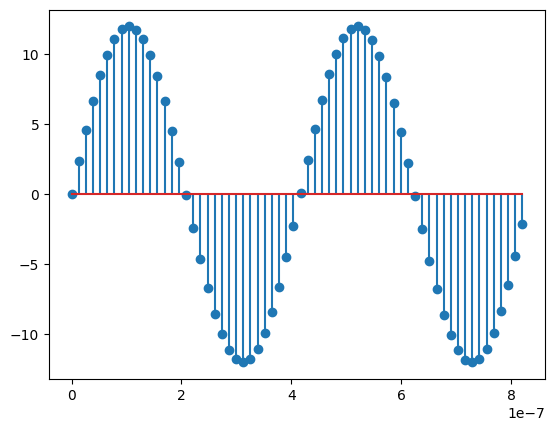

In [67]:
# Frecuencia de muestreo
freq_muestreo = np.arange(0, 0.000000832, 0.00000001302);
puntos_muestreo = gf.generate_sin(12, 15.1*10**6, freq_muestreo)
print(puntos_muestreo)
plt.stem(freq_muestreo, puntos_muestreo)

### Cuantizando la señal generada
    1. Generar los bits de trabajo
    * Se trabajaran con 5 bits para tener 32 niveles de cuantización
    2. Crear el rango de valores para la asignación
    3. Creando el codificador de la señal
    4. Muestreando y codificando la señal

### 2. Rango de valores para la asignación de los bits codificados

In [117]:
rango_muestreo = np.arange(-12, 12.75, 0.75)
print(rango_muestreo)
print( len(rango_muestreo))

[-12.   -11.25 -10.5   -9.75  -9.    -8.25  -7.5   -6.75  -6.    -5.25
  -4.5   -3.75  -3.    -2.25  -1.5   -0.75   0.     0.75   1.5    2.25
   3.     3.75   4.5    5.25   6.     6.75   7.5    8.25   9.     9.75
  10.5   11.25  12.  ]
33


### 3. Codificando la señal analógica

In [69]:
# Codificando la señal a tratar
def encode( value, quantity_bits ) :
    binary_value = ""
    if value >= 12 :
        binary_value = dtb.decimal_to_signed_binary(15, quantity_bits)
    elif value >= 11.25 :
        binary_value = dtb.decimal_to_signed_binary(15, quantity_bits)
    elif value >= 10.5 :
        binary_value = dtb.decimal_to_signed_binary(14, quantity_bits)
    elif value >= 9.75 : 
        binary_value = dtb.decimal_to_signed_binary(13, quantity_bits)
    elif value >= 9 :
        binary_value = dtb.decimal_to_signed_binary(12, quantity_bits)
    elif value >= 8.25 :
        binary_value = dtb.decimal_to_signed_binary(11, quantity_bits)
    elif value >= 7.5 :
        binary_value = dtb.decimal_to_signed_binary(10, quantity_bits)
    elif value >= 6.75 :
        binary_value = dtb.decimal_to_signed_binary(9, quantity_bits)
    elif value >= 6 :
        binary_value = dtb.decimal_to_signed_binary(8, quantity_bits)
    elif value >= 5.25 :
        binary_value = dtb.decimal_to_signed_binary(7, quantity_bits)
    elif value >= 4.5 :
        binary_value = dtb.decimal_to_signed_binary(6, quantity_bits)
    elif value >= 3.75 :
        binary_value = dtb.decimal_to_signed_binary(5, quantity_bits)
    elif value >= 3 :
        binary_value = dtb.decimal_to_signed_binary(4, quantity_bits)
    elif value >= 2.25 :
        binary_value = dtb.decimal_to_signed_binary(3, quantity_bits)
    elif value >= 1.5 :
        binary_value = dtb.decimal_to_signed_binary(2, quantity_bits)
    elif value >= 0.75 :
        binary_value = dtb.decimal_to_signed_binary(1, quantity_bits) 
    elif value >= 0 :
        binary_value = dtb.decimal_to_signed_binary(0, quantity_bits) 
    elif value >= -0.75 :
        binary_value = dtb.decimal_to_signed_binary(0, quantity_bits) 
    elif value >= -1.5 :
        binary_value = dtb.decimal_to_signed_binary(-1, quantity_bits) 
    elif value >= -2.25 :
        binary_value = dtb.decimal_to_signed_binary(-2, quantity_bits) 
    elif value >= -3 :
        binary_value = dtb.decimal_to_signed_binary(-3, quantity_bits) 
    elif value >= -3.75 :
        binary_value = dtb.decimal_to_signed_binary(-4, quantity_bits) 
    elif value >= -4.5 :
        binary_value = dtb.decimal_to_signed_binary(-5, quantity_bits) 
    elif value >= -5.25 :
        binary_value = dtb.decimal_to_signed_binary(-6, quantity_bits) 
    elif value >= -6 :
        binary_value = dtb.decimal_to_signed_binary(-7, quantity_bits) 
    elif value >=  -6.75:
        binary_value = dtb.decimal_to_signed_binary(-8, quantity_bits) 
    elif value >=  -7.5:
        binary_value = dtb.decimal_to_signed_binary(-9, quantity_bits) 
    elif value >=  -8.25:
        binary_value = dtb.decimal_to_signed_binary(-10, quantity_bits) 
    elif value >=  -9:
        binary_value = dtb.decimal_to_signed_binary(-11, quantity_bits) 
    elif value >=  -9.75:
        binary_value = dtb.decimal_to_signed_binary(-12, quantity_bits) 
    elif value >=  -10.5:
        binary_value = dtb.decimal_to_signed_binary(-13, quantity_bits) 
    elif value >=  -11.25:
        binary_value = dtb.decimal_to_signed_binary(-14, quantity_bits) 
    else :
        binary_value = dtb.decimal_to_signed_binary(-15, quantity_bits) 
    
    return binary_value
    

### 4. Muestreando y codificando la señal

In [70]:
# Codificando la señal a trabajar
encode_signal = []
for muestra in puntos_muestreo :
    encode_signal.append( encode(muestra, 4) )
print(encode_signal)


['00000', '00011', '00110', '01000', '01011', '01101', '01110', '01111', '01111', '01111', '01110', '01101', '01011', '01000', '00110', '00011', '00000', '10011', '10110', '11000', '11011', '11101', '11110', '11111', '11111', '11111', '11110', '11101', '11011', '11000', '10110', '10010', '00000', '00011', '00110', '01001', '01011', '01101', '01110', '01111', '01111', '01111', '01110', '01101', '01011', '01000', '00101', '00010', '00000', '10011', '10110', '11001', '11011', '11101', '11110', '11111', '11111', '11111', '11110', '11101', '11011', '11000', '10101', '10010']


### 5. Decodificando la señal

In [71]:
digital_signal = []
for bits in encode_signal :
    digital_signal.append(bind.signed_binary_to_decimal(bits))
print(digital_signal)

[0, 3, 6, 8, 11, 13, 14, 15, 15, 15, 14, 13, 11, 8, 6, 3, 0, -3, -6, -8, -11, -13, -14, -15, -15, -15, -14, -13, -11, -8, -6, -2, 0, 3, 6, 9, 11, 13, 14, 15, 15, 15, 14, 13, 11, 8, 5, 2, 0, -3, -6, -9, -11, -13, -14, -15, -15, -15, -14, -13, -11, -8, -5, -2]


### 6. Graficando la señal digital

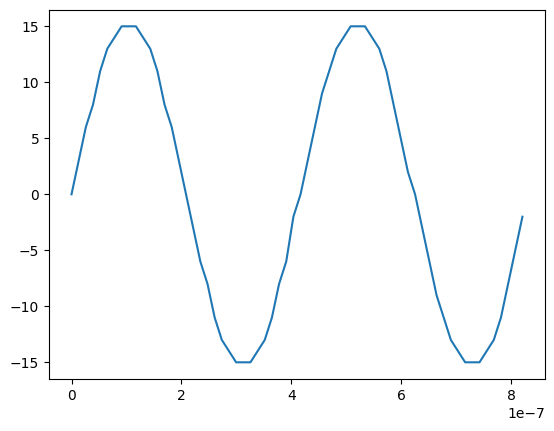

[0, 3, 6, 8, 11, 13, 14, 15, 15, 15, 14, 13, 11, 8, 6, 3, 0, -3, -6, -8, -11, -13, -14, -15, -15, -15, -14, -13, -11, -8, -6, -2, 0, 3, 6, 9, 11, 13, 14, 15, 15, 15, 14, 13, 11, 8, 5, 2, 0, -3, -6, -9, -11, -13, -14, -15, -15, -15, -14, -13, -11, -8, -5, -2]


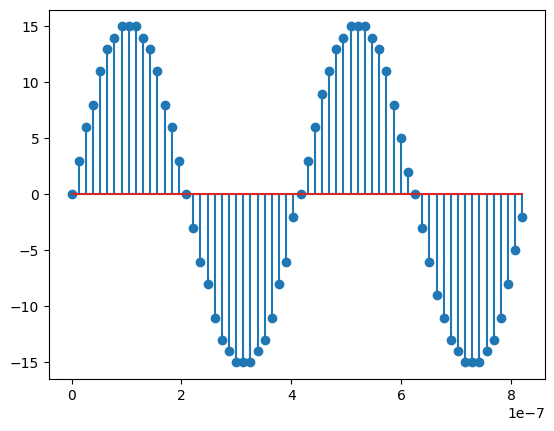

In [72]:
plt.plot(freq_muestreo, digital_signal)
plt.show()
plt.stem(freq_muestreo, digital_signal)
print(digital_signal)

### 7. Obteniendo el ruido de la señal (error)

In [88]:
error = np.subtract( puntos_muestreo, digital_signal)
print(puntos_muestreo[8])
print(digital_signal[8])
print(error[8])

11.999975525529187
15
-3.0000244744708127


### 8. Graficando el ruido

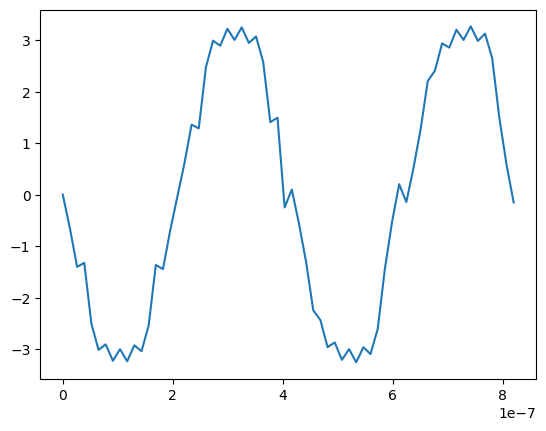

In [82]:
plt.plot(freq_muestreo, error)

### 9. Superponiendo las gráficas

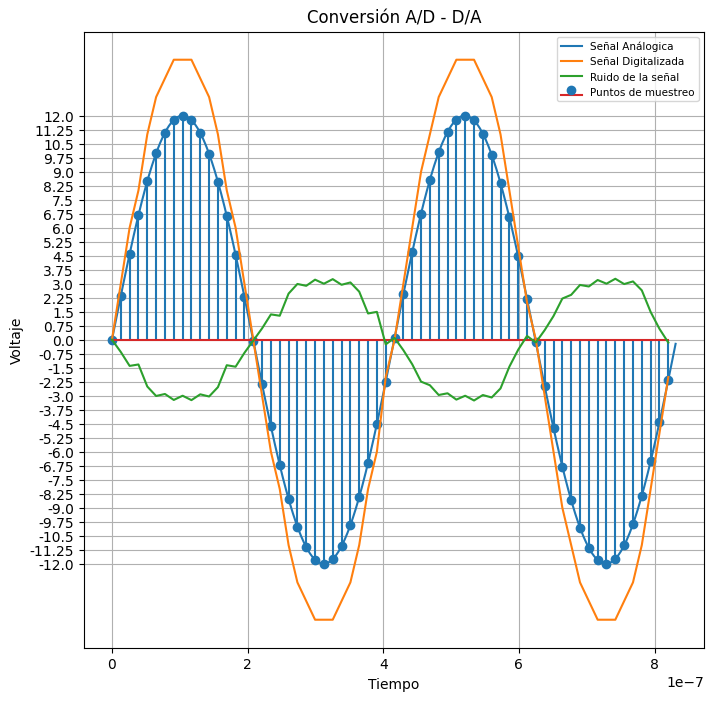

In [130]:
fig, ax = plt.subplots()

ax.plot(x, y, label="Señal Análogica")
ax.stem(freq_muestreo, puntos_muestreo, label="Puntos de muestreo")
ax.plot(freq_muestreo, digital_signal, label="Señal Digitalizada")
ax.plot(freq_muestreo, error, label="Ruido de la señal")

ax.set_title("Conversión A/D - D/A")

ax.grid(True)
ax.set_xlabel("Tiempo")
ax.set_ylabel("Voltaje")
ax.legend(loc="upper right", prop={'size': 7.5})

#ax.set_ylim(-12, 12)
ax.set_yticks(rango_muestreo, [str(inter) for inter in rango_muestreo])
fig.set_size_inches(8, 8)
plt.show()


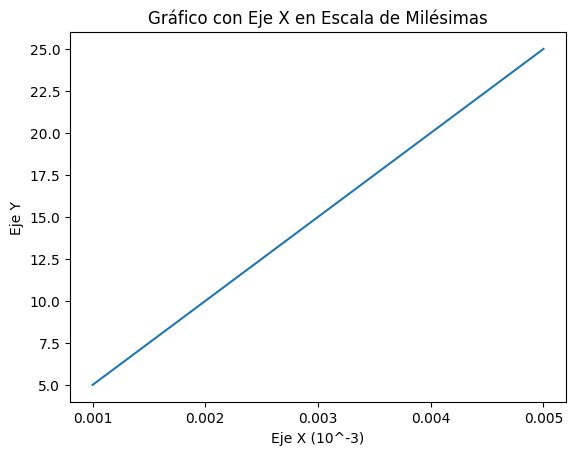

In [73]:
# Datos de ejemplo
x = [0.001, 0.002, 0.003, 0.004, 0.005]
y = [5, 10, 15, 20, 25]

plt.plot(x, y)
plt.xlabel("Eje X (10^-3)")
plt.ylabel("Eje Y")
plt.title("Gráfico con Eje X en Escala de Milésimas")
plt.xticks(x, [str(val) for val in x])  # Cambiar las etiquetas del eje x

plt.show()

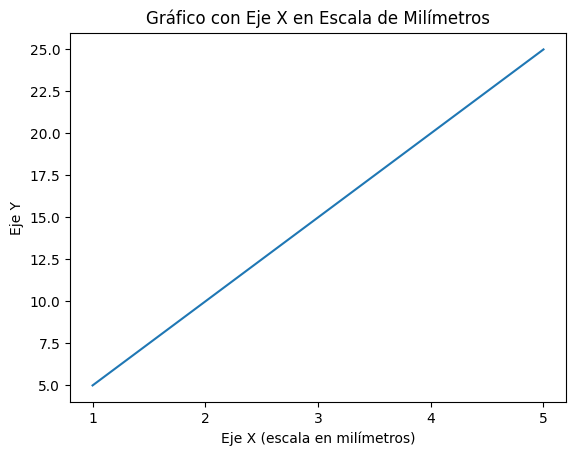

In [74]:
# Datos de ejemplo
x = [1, 2, 3, 4, 5]  # Valores en la escala que deseas mostrar (1, 2, ...)
x_scaled = [val * 0.001 for val in x]  # Valores ajustados para la escala en milésimas
y = [5, 10, 15, 20, 25]

plt.plot(x_scaled, y)
plt.xlabel("Eje X (escala en milímetros)")
plt.ylabel("Eje Y")
plt.title("Gráfico con Eje X en Escala de Milímetros")
plt.xticks(x_scaled, x)  # Cambiar las etiquetas del eje x a los valores originales

plt.show()


In [75]:
# Crear una matriz
matriz = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
matriz1 = np.linspace(0, 10, 5)
matriz_sin = 10*np.sin(matriz1*2.1)
# Escalar por el cual multiplicar la matriz
escalar = 2.3123

# Multiplicar la matriz por el escalar
matriz_resultante = matriz * escalar
matriz2 = matriz1*escalar
print(matriz_sin/10)
print(matriz_sin)
print(escalar*matriz_sin)


print(matriz2)
print(matriz_resultante)

[ 0.         -0.85893449 -0.87969576 -0.04202435  0.83665564]
[ 0.         -8.58934493 -8.7969576  -0.42024353  8.36655639]
[  0.         -19.86114229 -20.34120506  -0.97172911  19.34598833]
[ 0.       5.78075 11.5615  17.34225 23.123  ]
[[ 2.3123  4.6246  6.9369]
 [ 9.2492 11.5615 13.8738]
 [16.1861 18.4984 20.8107]]


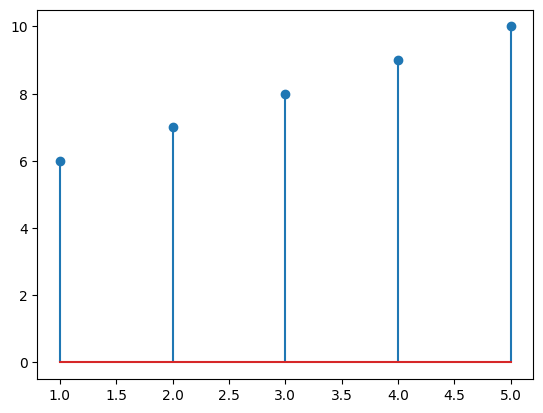

In [76]:
import matplotlib.pyplot as plt

# Crea los datos
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]

# Crea la gráfica
plt.stem(x, y)

# Muestra la gráfica
plt.show()


In [78]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8, 9], [10, 11, 12]])

C = np.subtract(A, B)

print(C)


[[-6 -6 -6]
 [-6 -6 -6]]


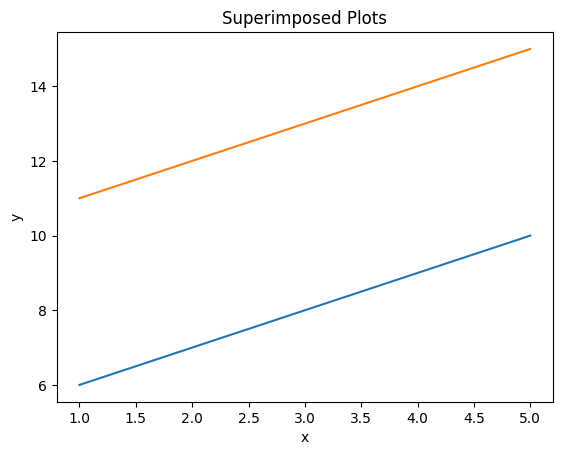

In [89]:
import matplotlib.pyplot as plt

# Create two arrays of data
x1 = [1, 2, 3, 4, 5]
y1 = [6, 7, 8, 9, 10]
x2 = [1, 2, 3, 4, 5]
y2 = [11, 12, 13, 14, 15]

# Create a figure and an axes
fig, ax = plt.subplots()

# Plot the two lines
ax.plot(x1, y1, label="Line 1")
ax.plot(x2, y2, label="Line 2")

# Set the title and labels
ax.set_title("Superimposed Plots")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Show the plot
plt.show()

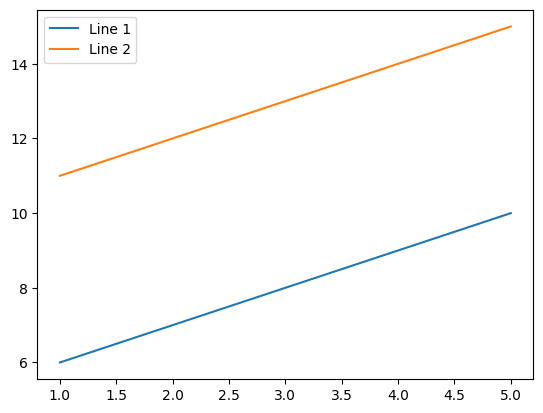

In [104]:
import matplotlib.pyplot as plt

# Create a figure and an axes
fig, ax = plt.subplots()

# Plot some data
ax.plot([1, 2, 3, 4, 5], [6, 7, 8, 9, 10], label="Line 1")
ax.plot([1, 2, 3, 4, 5], [11, 12, 13, 14, 15], label="Line 2")

# Add a legend
ax.legend(loc="upper left")

# Show the plot
plt.show()

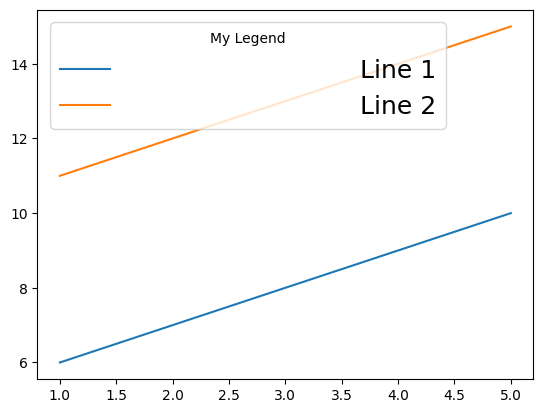

In [105]:
import matplotlib.pyplot as plt

# Create a figure and an axes
fig, ax = plt.subplots()

# Plot some data
ax.plot([1, 2, 3, 4, 5], [6, 7, 8, 9, 10], label="Line 1")
ax.plot([1, 2, 3, 4, 5], [11, 12, 13, 14, 15], label="Line 2")

# Add a legend
ax.legend(loc="upper left", prop={'size': 18}, title="My Legend", handletextpad=10)

# Show the plot
plt.show()

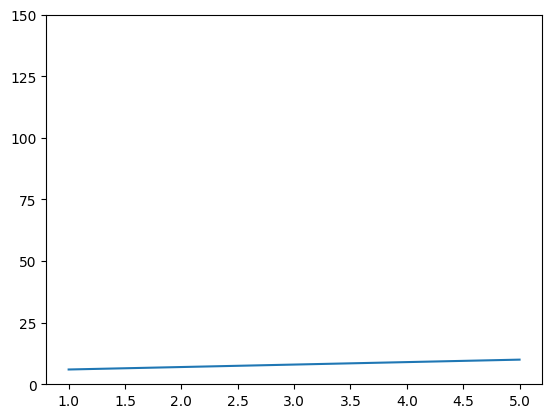

In [114]:
import matplotlib.pyplot as plt

# Create a figure and an axes
fig, ax = plt.subplots()

# Plot some data
ax.plot([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])

# Set the ylim
ax.set_ylim(0, 150)

# Set the yticks
ax.set_yticks(np.arange(0, 175, 25))

# Set the yticklabels
ax.set_yticklabels(["0", "25", "50", "75", "100", "125", "150"])

# Show the plot
plt.show()

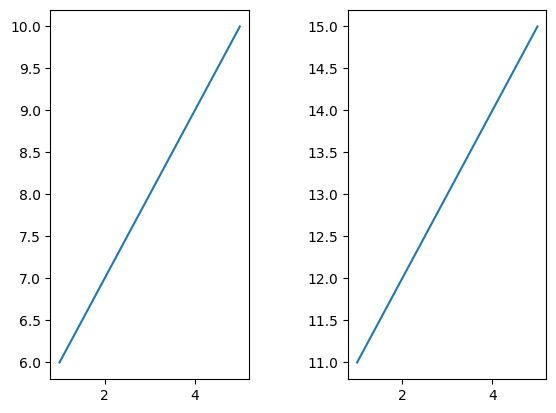

In [123]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# Plot some data on the first subplot
ax1.plot([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])

# Plot some data on the second subplot
ax2.plot([1, 2, 3, 4, 5], [11, 12, 13, 14, 15])

# Adjust the subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plot
plt.show()